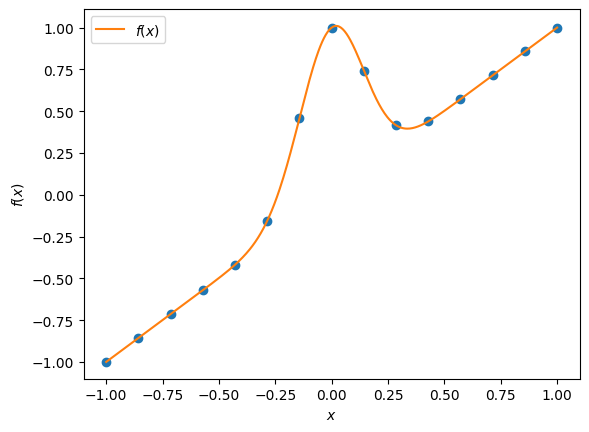

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
N = 15
def f(x):
    return np.exp(-(5*x)**2) + x
x = np.linspace(-1, 1, N)
xx = np.linspace(-1, 1, 500)
f_eq = f(x) 

plt.plot(x, f_eq, 'o')
plt.plot(xx, f(xx), label='$f(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.savefig('原函数.png')

In [3]:
def lagrange_interpolant(x, f):
    N = len(x)
    a = np.ones(N)
    for i in range(N):
        for j in range(N):
            if i != j:
                a[i] *= 1/(x[i] - x[j])
    def p(x_):
        result = 0.
        for i in range(N):
            term_i = a[i] * f[i]
            for j in range(N):
                if i != j:
                    term_i *= x_ - x[j]
            result += term_i
        return result
    
    return p

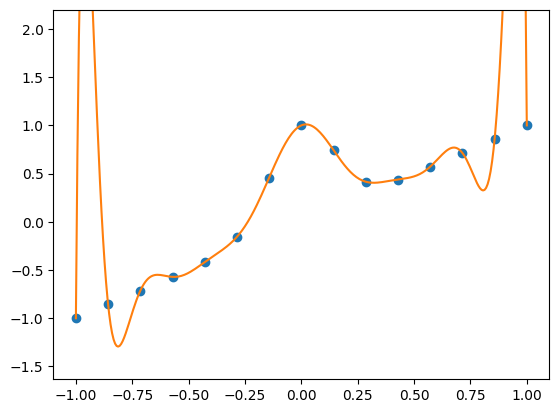

In [13]:
N = 15

def f(x):
    return np.exp(-(5*x)**2) + x

x = np.linspace(-1, 1, N)
f_eq = f(x) 
f_inter = lagrange_interpolant(x, f_eq)

xx = np.linspace(-1, 1, 300)

plt.plot(x, f_eq, 'o')
plt.plot(xx, f_inter(xx))
plt.ylim(None, 2.2)
plt.savefig('拉格朗日插值.png')

In [5]:
def chebyshevspace(x_left, x_right, N):
    radius = (x_right - x_left) / 2.
    center = (x_right + x_left) / 2.    
    return center + radius * np.cos(np.pi - np.arange(N+1)*np.pi/N)

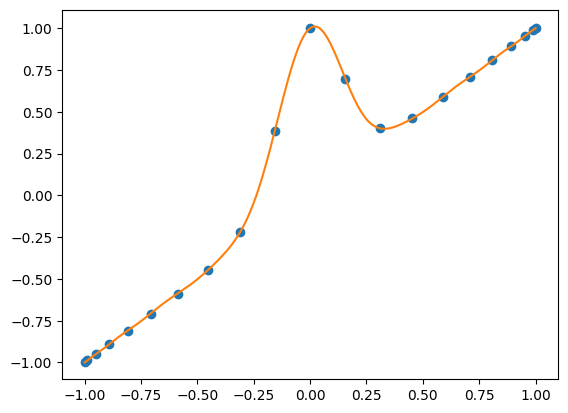

In [14]:
x = chebyshevspace(-1, 1, 20)

f_cheb = f(x) 
f_inter = lagrange_interpolant(x, f_cheb)

xx = np.linspace(-1, 1, 300)

plt.plot(x, f_cheb, 'o')
plt.plot(xx, f_inter(xx))
plt.savefig('切比雪夫插值.png')

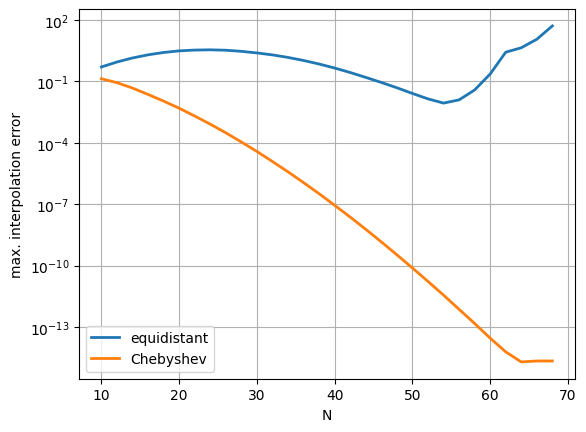

In [15]:
Ns = np.arange(10, 70, 2)

errs_eq = []
errs_cheb = []
xx = np.linspace(-1, 1, 300)

def calc_error(x_k, f_k):
    """Calculate the error of interpolated solution"""
    f_inter = lagrange_interpolant(x_k, f_k)
    return np.max(np.abs(f_inter(xx) - f(xx)))

    
for N in Ns:
    
    # Equidistant polynomial interpolation:    
    x = np.linspace(-1, 1, N)
    
    errs_eq.append(
        calc_error(x, f(x))
    )
    
    # Chebyshev polynomial interpolation:
    x = chebyshevspace(-1, 1, N)
    
    errs_cheb.append(
        calc_error(x, f(x))
    )

plt.semilogy(Ns, errs_eq, label='equidistant', lw=2)
plt.semilogy(Ns, errs_cheb, label='Chebyshev', lw=2)
plt.grid()
plt.xlabel('N')
plt.ylabel('max. interpolation error')
plt.legend()
plt.savefig('误差.png')